In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset from external storage
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# check shape of dataframe
df.shape

(83439, 48)

In [4]:
# select only important columns for better prediction
df2 = df[['Employment', 'Country', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]
df2.rename({'ConvertedCompYearly':'Salary', 'YearsCodePro':'YearOfExperience', 'EdLevel':'HighestEducation'}, axis = 1, inplace=True)
df2.head()

C:\Users\mridh\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Employment,Country,HighestEducation,YearOfExperience,Salary
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,62268.0
1,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
2,"Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
3,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN
4,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,NaN


# Data Cleaning

In [5]:
# removeing null values from salary column
df2 = df2[df2['Salary'].notnull()]
df2.head()

,Employment,Country,HighestEducation,YearOfExperience,Salary
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,62268.0
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0


In [6]:
# find null values in dataframe
df2.isnull().sum()

Employment           13
Country               0
HighestEducation     21
YearOfExperience    453
Salary                0
dtype: int64

In [7]:
# remove all null values from dataframe
df2.dropna(inplace=True)

In [8]:
# check null values after cleaning
df2.isnull().sum()

Employment          0
Country             0
HighestEducation    0
YearOfExperience    0
Salary              0
dtype: int64

In [9]:
# only select those data where employment is full time
df2 = df2[df2['Employment']== 'Employed full-time']
df2.head()

,Employment,Country,HighestEducation,YearOfExperience,Salary
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [10]:
# new data frame shape
df2.shape

(40211, 5)

In [11]:
# check values in country column
country = df2['Country'].value_counts()
country

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [12]:
# country whose count is below then 400 asign them into new variable
lessThen400 = country[country<400]
lessThen400

Mexico                          382
Ukraine                         381
Iran, Islamic Republic of...    348
Denmark                         347
Belgium                         346
                               ... 
Saint Kitts and Nevis             1
Monaco                            1
Libyan Arab Jamahiriya            1
Somalia                           1
Burundi                           1
Name: Country, Length: 148, dtype: int64

In [13]:
# country whose count is below then 400, convert them into others
df2['Country'] = df2['Country'].apply(lambda x: 'Others' if x in lessThen400 else x)

In [14]:
# country values count after converting
df2.Country.value_counts()

Others                                                  10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [15]:
# remove those data where country is others
df2 = df2[df2['Country'] != 'Others']
df2

,Employment,Country,HighestEducation,YearOfExperience,Salary
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0
...,...,...,...,...,...
83432,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Less than 1 year,80169.0
83434,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,160500.0
83436,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",4,90000.0
83437,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,816816.0


In [16]:
# country values counts after remove others data
df2['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
France                                                  1396
Brazil                                                  1340
Spain                                                    890
Netherlands                                              835
Australia                                                825
Poland                                                   775
Italy                                                    756
Russian Federation                                       741
Sweden                                                   735
Turkey                                                   458
Switzerland                                              438
Israel                  

**Some Country Name Is Very Big So First We Have To Replace Them With Small Name**

In [17]:
# rename countries whose name is very big
df2.Country.replace('United Kingdom of Great Britain and Northern Ireland', 'Uk',inplace=True )
df2.Country.replace('United States of America', 'America',inplace=True )
df2.Country.replace('Russian Federation', 'Russia',inplace=True )

In [18]:
# check unique values in country column
df2.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland', 'Uk', 'Russia', 'Israel', 'America', 'Brazil',
       'Italy', 'Netherlands', 'Poland', 'India', 'Australia', 'Norway'],
      dtype=object)

In [19]:
# check values count of highest education column
df2.HighestEducation.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          14516
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        7644
Some college/university study without earning a degree                                 3252
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1242
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1087
Associate degree (A.A., A.S., etc.)                                                     935
Professional degree (JD, MD, etc.)                                                      397
Something else                                                                          308
Primary/elementary school                                                               105
Name: HighestEducation, dtype: int64

In [20]:
# create a function to replace highest education column data
def change_education(x):
    if x == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        return "Bachelor's Degree"
    elif x == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        return "Master’s Degree"
    elif x == 'Primary/elementary school' or x == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' or x == 'Some college/university study without earning a degree' or x == 'Other doctoral degree (Ph.D., Ed.D., etc.)' or x == 'Associate degree (A.A., A.S., etc.)' or x == 'Professional degree (JD, MD, etc.)' or x == 'Something else' :
        return "Non It Degree"
    return x

In [21]:
# apply function on highest education column
df2['HighestEducation'] = df2['HighestEducation'].apply(change_education)

In [22]:
# check value counts of highest education column after replace value
df2.HighestEducation.value_counts()

Bachelor's Degree    14516
Master’s Degree       7644
Non It Degree         7326
Name: HighestEducation, dtype: int64

In [23]:
# check unique value in year of experience column
df2['YearOfExperience'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '12', '8', '17', '1', '14', '7', '26', '34', '11', '25',
       '24', '22', '13', '9', '39', '20', '27', '23', '35', '30', '19',
       '33', '37', '43', '40', '29', '38', '31', '45', '42', '28', '46',
       '32', '36', '47', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

**There Are Some Wrong Datas, We Have To Replace Them With Right Data**

In [24]:
# create a function to replace value of year of experience column
def change_year(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 50
    return float(x)

In [25]:
# apply function
df2['YearOfExperience'] = df2['YearOfExperience'].apply(change_year)

In [26]:
# check unique value in year of experience column after replace
df2['YearOfExperience'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
       12. ,  8. , 17. ,  1. , 14. ,  7. , 26. , 34. , 11. , 25. , 24. ,
       22. , 13. ,  9. , 39. , 20. , 27. , 23. , 35. , 30. , 19. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 45. , 42. , 28. , 46. , 32. ,
       36. , 47. , 44. , 41. , 50. , 49. , 48. ])

# Find And Remove Outliers

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


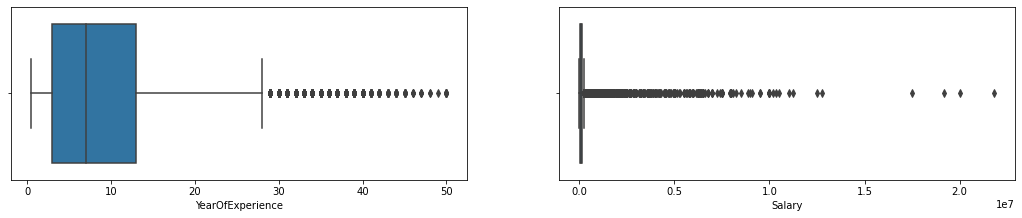

In [27]:
# check outliers by boxplot
plt.figure(figsize=(18,7))
plt.subplot(2,2,1)
sns.boxplot(df2['YearOfExperience'])
plt.subplot(2,2,2)
sns.boxplot(df2['Salary'])
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


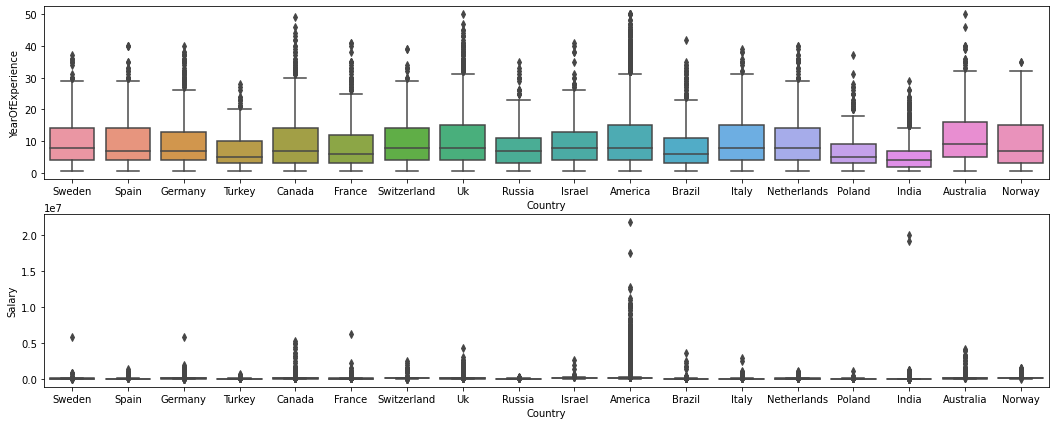

In [28]:
# find outliers based on country
plt.figure(figsize = (18,7))
plt.subplot(2,1,1)
sns.boxplot(df2['Country'], df2['YearOfExperience'])
plt.subplot(2,1,2)
sns.boxplot(df2['Country'], df2['Salary'])
plt.show()

**We Can See There Are Different Different Outliers Based On Country, So We Have To Clean Them One By One**

**Find And Remove Outliers From Year Of Experience And Salary Column**

In [29]:
sweden = df2[df2['Country'] == 'Sweden']
spain = df2[df2['Country'] == 'Spain']
germany = df2[df2['Country'] == 'Germany']
turkey = df2[df2['Country'] == 'Turkey']
canada = df2[df2['Country'] == 'Canada']

france = df2[df2['Country'] == 'France']
switzerland = df2[df2['Country'] == 'Switzerland']
uk = df2[df2['Country'] == 'Uk']
russia = df2[df2['Country'] == 'Russia']

israel = df2[df2['Country'] == 'Israel']
america = df2[df2['Country'] == 'America']
brazil = df2[df2['Country'] == 'Brazil']

italy = df2[df2['Country'] == 'Italy']
netherlands = df2[df2['Country'] == 'Netherlands']
poland = df2[df2['Country'] == 'Poland']
india = df2[df2['Country'] == 'India']
australia = df2[df2['Country'] == 'Australia']
norway = df2[df2['Country'] == 'Norway']

In [30]:
# India

low = india['Salary'].quantile(0.25)
high = india['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

india['Salary'] = india['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = india['YearOfExperience'].quantile(0.25)
high = india['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

india['YearOfExperience'] = india['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# America

low = america['Salary'].quantile(0.25)
high = america['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

america['Salary'] = america['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = america['YearOfExperience'].quantile(0.25)
high = america['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

america['YearOfExperience'] = america['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Russia

low = russia['Salary'].quantile(0.25)
high = russia['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

russia['Salary'] = russia['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = russia['YearOfExperience'].quantile(0.25)
high = russia['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

russia['YearOfExperience'] = russia['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Brazil

low = brazil['Salary'].quantile(0.25)
high = brazil['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

brazil['Salary'] = brazil['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = brazil['YearOfExperience'].quantile(0.25)
high = brazil['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr

brazil['YearOfExperience'] = brazil['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Uk

low = uk['Salary'].quantile(0.25)
high = uk['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
uk['Salary'] = uk['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = uk['YearOfExperience'].quantile(0.25)
high = uk['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
uk['YearOfExperience'] = uk['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Israel

low = israel['Salary'].quantile(0.25)
high = israel['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
israel['Salary'] = israel['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = israel['YearOfExperience'].quantile(0.25)
high = israel['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
israel['YearOfExperience'] = israel['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# France

low = france['Salary'].quantile(0.25)
high = france['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
france['Salary'] = france['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = france['YearOfExperience'].quantile(0.25)
high = france['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
france['YearOfExperience'] = france['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Sweden

low = sweden['Salary'].quantile(0.25)
high = sweden['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
sweden['Salary'] = sweden['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)
sweden['Salary'] = sweden['Salary'].apply(lambda x: percentile_1 if x<percentile_1 else x)

low = sweden['YearOfExperience'].quantile(0.25)
high = sweden['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
sweden['YearOfExperience'] = sweden['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Spain

low = spain['Salary'].quantile(0.25)
high = spain['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
spain['Salary'] = spain['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = spain['YearOfExperience'].quantile(0.25)
high = spain['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
spain['YearOfExperience'] = spain['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Germany

low = germany['Salary'].quantile(0.25)
high = germany['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
germany['Salary'] = germany['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)
germany['Salary'] = germany['Salary'].apply(lambda x: percentile_1 if x<percentile_1 else x)

low = germany['YearOfExperience'].quantile(0.25)
high = germany['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
germany['YearOfExperience'] = germany['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Turkey

low = turkey['Salary'].quantile(0.25)
high = turkey['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
turkey['Salary'] = turkey['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = turkey['YearOfExperience'].quantile(0.25)
high = turkey['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
turkey['YearOfExperience'] = turkey['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Canada

low = canada['Salary'].quantile(0.25)
high = canada['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
canada['Salary'] = canada['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = canada['YearOfExperience'].quantile(0.25)
high = canada['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
canada['YearOfExperience'] = canada['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Switzerland

low = switzerland['Salary'].quantile(0.25)
high = switzerland['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
switzerland['Salary'] = switzerland['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)
switzerland['Salary'] = switzerland['Salary'].apply(lambda x: percentile_1 if x<percentile_1 else x)

low = switzerland['YearOfExperience'].quantile(0.25)
high = switzerland['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
switzerland['YearOfExperience'] = switzerland['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Italy

low = italy['Salary'].quantile(0.25)
high = italy['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
italy['Salary'] = italy['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = italy['YearOfExperience'].quantile(0.25)
high = italy['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
italy['YearOfExperience'] = italy['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Netherlands

low = netherlands['Salary'].quantile(0.25)
high = netherlands['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
netherlands['Salary'] = netherlands['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = netherlands['YearOfExperience'].quantile(0.25)
high = netherlands['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
netherlands['YearOfExperience'] = netherlands['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Poland

low = poland['Salary'].quantile(0.25)
high = poland['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
poland['Salary'] = poland['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = poland['YearOfExperience'].quantile(0.25)
high = poland['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
poland['YearOfExperience'] = poland['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Australia

low = australia['Salary'].quantile(0.25)
high = australia['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
australia['Salary'] = australia['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)

low = australia['YearOfExperience'].quantile(0.25)
high = australia['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
australia['YearOfExperience'] = australia['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)

# Norway

low = norway['Salary'].quantile(0.25)
high = norway['Salary'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
norway['Salary'] = norway['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)
norway['Salary'] = norway['Salary'].apply(lambda x: percentile_1 if x<percentile_1 else x)

low = norway['YearOfExperience'].quantile(0.25)
high = norway['YearOfExperience'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = low + 1.5 * iqr
norway['YearOfExperience'] = norway['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)


C:\Users\mridh\AppData\Local\Temp/ipykernel_9228/3575072362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Salary'] = india['Salary'].apply(lambda x: percentile_3 if x>percentile_3 else x)
C:\Users\mridh\AppData\Local\Temp/ipykernel_9228/3575072362.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['YearOfExperience'] = india['YearOfExperience'].apply(lambda x: percentile_3 if x>percentile_3 else x)
C:\Users\mridh\AppData\Local\Temp/ipykernel_9228/3575072362.py:30: SettingWithCopyWarnin

In [31]:
# concate all dataframes and create new dataframe
new_df = pd.concat([india,russia,italy,america,uk,brazil,norway,netherlands,poland,australia,israel,sweden,switzerland,france,canada,germany,turkey,spain],ignore_index=True)

In [32]:
new_df.head()

,Employment,Country,HighestEducation,YearOfExperience,Salary
0,Employed full-time,India,Bachelor's Degree,1.0,1512.0
1,Employed full-time,India,Master’s Degree,9.5,30716.0
2,Employed full-time,India,Bachelor's Degree,2.0,5585.0
3,Employed full-time,India,Bachelor's Degree,5.0,37696.5
4,Employed full-time,India,Bachelor's Degree,4.0,21676.0


In [33]:
# new dataframe shape
new_df.shape

(29486, 5)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


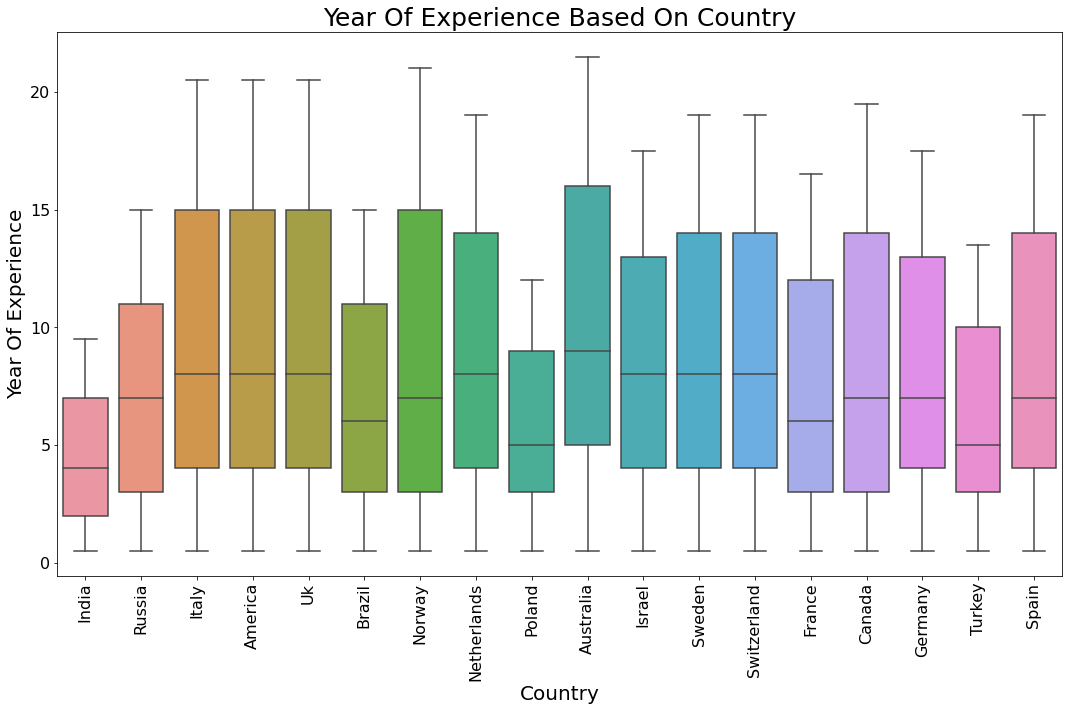

In [34]:
# check outliers in year of experience column after cleaning
plt.figure(figsize = (18,10))
sns.boxplot(new_df.Country,new_df.YearOfExperience)
plt.title('Year Of Experience Based On Country', fontsize = 25)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 16)
plt.ylabel('Year Of Experience', fontsize = 20)
plt.yticks(fontsize = 16)
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


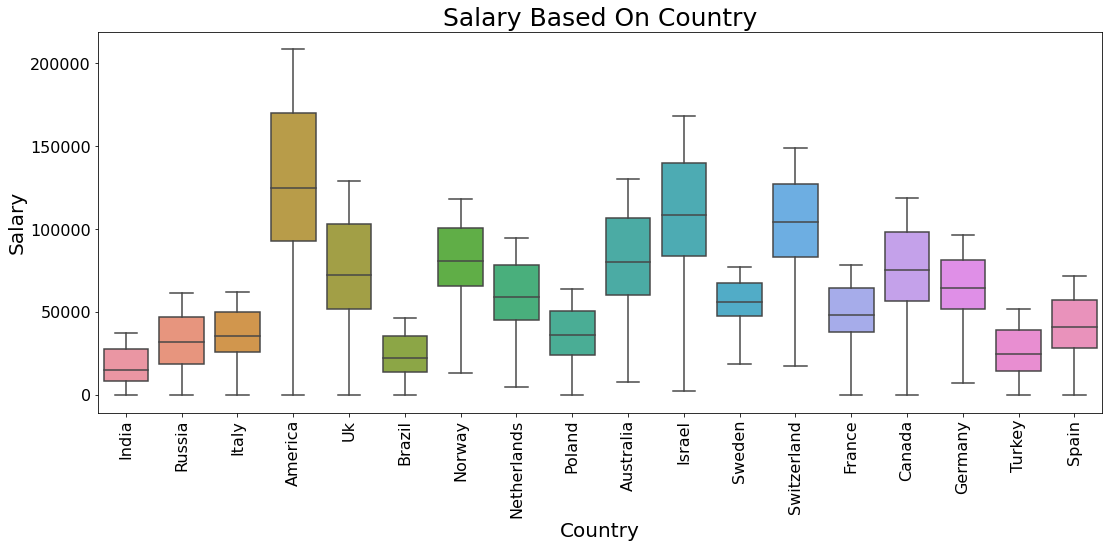

In [35]:
# check outliers in salary column after cleaning
plt.figure(figsize = (18,7))
sns.boxplot(new_df.Country,new_df.Salary)
plt.title('Salary Based On Country', fontsize = 25)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 16)
plt.ylabel('Salary', fontsize = 20)
plt.yticks(fontsize = 16)
plt.show()

In [36]:
# drop employment column for better prediction
new_df.drop('Employment', axis = 1, inplace=True)

In [37]:
new_df.head()

,Country,HighestEducation,YearOfExperience,Salary
0,India,Bachelor's Degree,1.0,1512.0
1,India,Master’s Degree,9.5,30716.0
2,India,Bachelor's Degree,2.0,5585.0
3,India,Bachelor's Degree,5.0,37696.5
4,India,Bachelor's Degree,4.0,21676.0


In [38]:
dfx = new_df.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le_country = LabelEncoder()
dfx['Country'] = le_country.fit_transform(dfx['Country'])
dfx['Country'].unique()

array([ 6, 12,  8,  0, 17,  2, 10,  9, 11,  1,  7, 14, 15,  4,  3,  5, 16,
       13])

In [41]:
le_education = LabelEncoder()
dfx['HighestEducation'] = le_education.fit_transform(dfx['HighestEducation'])
dfx['HighestEducation'].unique()

array([0, 1, 2])

In [42]:
dfx.head()

,Country,HighestEducation,YearOfExperience,Salary
0,6,0,1.0,1512.0
1,6,1,9.5,30716.0
2,6,0,2.0,5585.0
3,6,0,5.0,37696.5
4,6,0,4.0,21676.0


# Model Building

In [43]:
# values assign in x and y
X = dfx.drop('Salary', axis = 1)
y = dfx['Salary']

In [44]:
# import train test split for split data
from sklearn.model_selection import train_test_split

In [45]:
# split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [46]:
# import decision tree regressor for prediction
from sklearn.tree import DecisionTreeRegressor

**Use Grid Search CV For Better Result**

In [47]:
# import grid search cv fro get best model
from sklearn.model_selection import GridSearchCV

In [48]:
# train our model by different different paramiters
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,20,30]}
dtr = DecisionTreeRegressor()
gsc = GridSearchCV(dtr,params,scoring='neg_mean_squared_error')
gsc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [49]:
# check best score and parameter of our model
print('Best Parameters:', gsc.best_params_)
print('Best Scores:', gsc.best_score_)

Best Parameters: {'max_depth': 20}
Best Scores: -921550793.9987423


In [50]:
# train our model with best estimator
dttr = gsc.best_estimator_
dttr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [51]:
# get prediction value
y_pred = dttr.predict(X_test)

In [52]:
# import r2 score for check performance of our model
from sklearn.metrics import r2_score

In [53]:
# check accuracy of our model
r2_score(y_test,y_pred)

0.6754083918512388

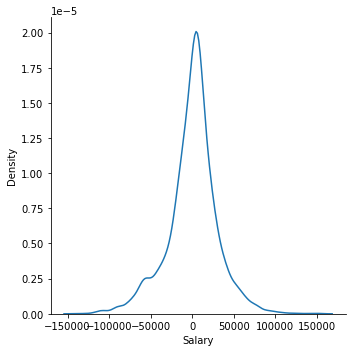

In [54]:
# check performance and accuracy by distplot
sns.displot(y_pred-y_test,kind = 'kde')
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


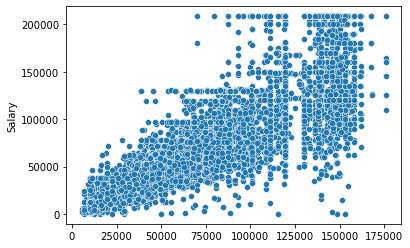

In [55]:
# check accuracy and performance of model by scatter plot
sns.scatterplot(y_pred,y_test)
plt.show()